In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inliine

UsageError: Line magic function `%matplotlib.inliine` not found.


In [2]:
df = pd.read_csv("Crowdedness at the Campus Gym data.csv")
df.head(5)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [18]:
df=df.drop(['date'], axis = 1) 

In [19]:
df.shape

(62184, 10)

In [3]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

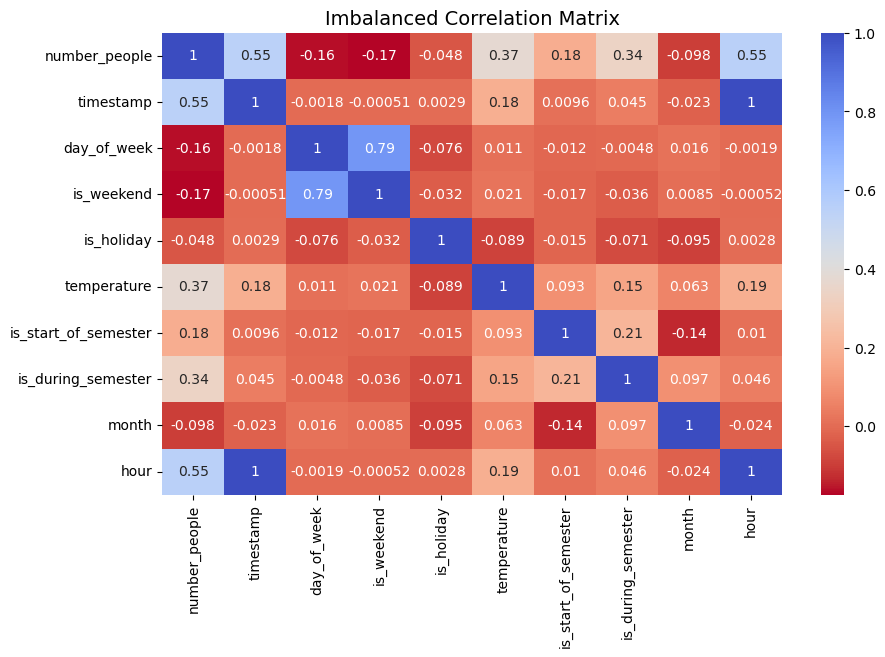

In [4]:
correl_2019 = df.corr()
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(correl_2019, cmap ='coolwarm_r',annot=True, ax =ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

In [5]:
Fahernheit = df['temperature']
F = Fahernheit.tolist()
C = map(lambda x: (float(5)/9) * (x-32), F)
Celcius = list(C)

In [10]:
temperature_celcius = pd.Series(Celcius)
df['temperature'] = temperature_celcius
df['temperature']
df.head(5)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,22.088889,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,22.088889,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,22.088889,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,22.088889,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,22.088889,0,0,8,17


In [20]:
X = df.iloc[:,1:10]
Y = df.iloc[:,0]

Text(0.5, 1.0, 'Correlation between different fearures')

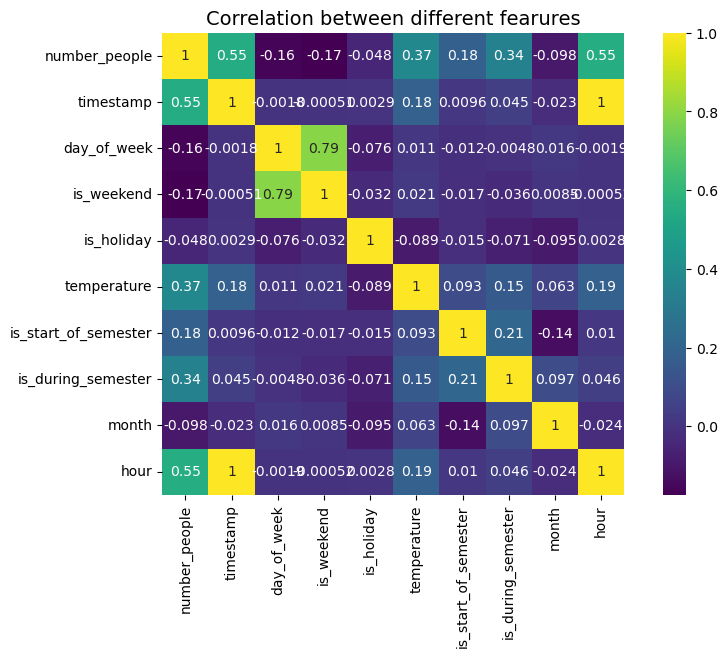

In [21]:
correl_2019 = df.corr()
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(correl_2019, vmax =1, cmap ='viridis', square = True, annot=True, ax =ax)
ax.set_title("Correlation between different fearures", fontsize=14)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.68623792,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.71106127,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 0.96515979,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 0.99010704,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ]])

In [23]:
from sklearn.decomposition import PCA
pca =PCA(n_components=5)
X_new = pca.fit_transform(X)
X_new.shape

(62184, 5)

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.23071484, 0.20019454, 0.14533716, 0.12878731, 0.10170457])

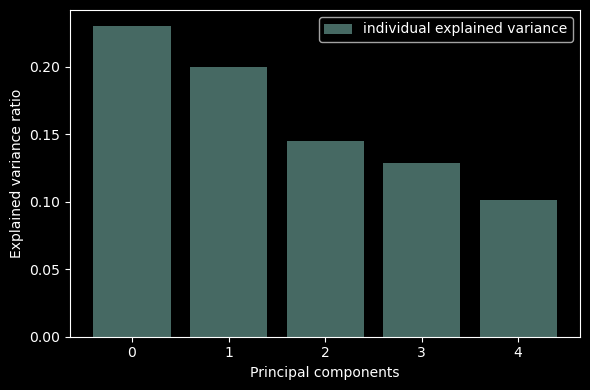

In [25]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y,train_size= 0.8, random_state =0)

In [27]:
from sklearn.ensemble import RandomForestRegressor
model =RandomForestRegressor()

In [28]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))

In [29]:
print(scores)

[0.9014309735706411, 0.9074167740825383, 0.9092352705824502, 0.9091476944647345, 0.9105406327452545, 0.9112435207239165, 0.9114943913190859, 0.9115007474104834, 0.9115191935048441, 0.9116779411922135, 0.9120328372114841, 0.9111842423995766, 0.9119391159384455, 0.9115379564107917, 0.911994643794205, 0.9119177408100528, 0.9118089499149918, 0.9119882381362181, 0.9121101522938815]


Text(0.5, 1.0, 'Effect of n_estimators')

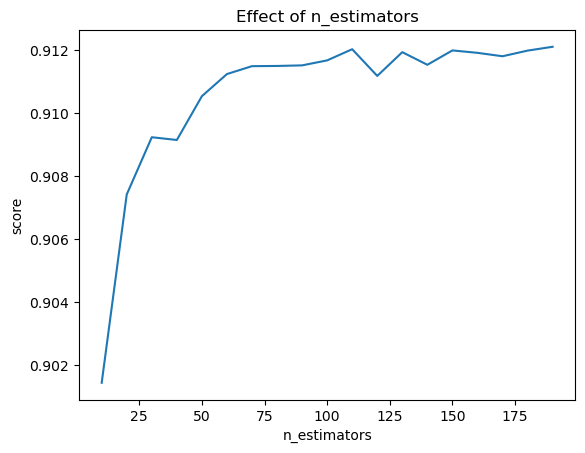

In [30]:
plt.plot(estimators,scores)
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.title("Effect of n_estimators")

In [32]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 7.8 MB/s eta 0:00:00


In [33]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [40]:
model1 =RandomForestClassifier()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model1.set_params(n_estimators=n)
    model1.fit(X_train, Y_train)
    scores.append(model1.score(X_test, Y_test))